In [1]:
import datetime
import time as tm
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

from Model.Model import foodColectionModel

In [2]:
WIDTH = 20
HEIGHT = 20
NUM_AGENTS = 5
TOTAL_FOOD = 47
ITER = 1500
STEPS_TO_COMPLETE = 0
STARTING_STEP = 5
total = 0

model = foodColectionModel(WIDTH, HEIGHT, NUM_AGENTS, TOTAL_FOOD, STARTING_STEP)

while True:
    model.step()
    total += 1
    if model.depositQuantity == TOTAL_FOOD:
        STEPS_TO_COMPLETE = total
        print("Food collected at step: ", total)
        break


# for i in range(ITER):
#     model.step()
#     total += 1
#     if model.depositQuantity == TOTAL_FOOD:
#         STEPS_TO_COMPLETE = total
#         print("Food collected at step: ", total)
#         break

Food collected at step:  375


In [3]:
all_data = model.datacollector.get_model_vars_dataframe()

# # Animate food data
# foodData = all_data.get("Food")

# fig, axis = plt.subplots(figsize=(5, 5))
# axis.set_title("Food Colection")
# axis.set_xticks([])
# axis.set_yticks([])

# patch = axis.imshow(foodData[10], cmap="Greens")

# def animate(i):
#     patch.set_data(foodData[i])
#     return patch

# plt.close()

# anim = animation.FuncAnimation(fig, animate, frames=ITER, interval=100)
# anim

In [4]:
# # animate the agents

# AgentData = all_data.get("Agents")

# fig, axis = plt.subplots(figsize=(5, 5))
# axis.set_title("Agents")
# axis.set_xticks([])
# axis.set_yticks([])

# patch = axis.imshow(AgentData[0], cmap="Greys")


# def animate(i):
#     patch.set_data(AgentData[i])
#     return patch


# plt.close()
# anim = animation.FuncAnimation(fig, animate, frames=STEPS_TO_COMPLETE if model.depositQuantity == 47 else ITER, interval=100)
# anim

In [5]:
# Animate the data joined

allData = all_data.get("Agents")  + all_data.get("Food")* 10


fig, axis = plt.subplots(figsize=(5, 5))
axis.set_title("Food Colection")
axis.set_xticks([])
axis.set_yticks([])

patch = axis.imshow(allData[10], cmap="Greys")
 
def animate(i):
    patch.set_data(allData[i])
    return patch

plt.close()

anim = animation.FuncAnimation(fig, animate, frames=STEPS_TO_COMPLETE if model.depositQuantity==47 else ITER, interval=100)
anim

# Statistics

In [6]:
def collectStats(width, height, num_agents, total_food, starting_step):
    model = foodColectionModel(width, height, num_agents, total_food, starting_step)
    total = 0
    while True:
        model.step()
        total += 1
        if model.depositQuantity == total_food:
            steps_to_complete = total
            print("Food collected at step: ", total, "in Size: ", width)
            break
    return steps_to_complete

In [7]:
def collectStatsUntilIter(width, height, num_agents, total_food, starting_step):
    model = foodColectionModel(
        width, height, num_agents, total_food, starting_step)
    total = 0
    for i in range(ITER):
        model.step()
        total += 1
        if model.depositQuantity == total_food:
            steps_to_complete = total
            print("Food collected at step: ", total, "in Size: ", width)
            break
    return steps_to_complete if model.depositQuantity == total_food else ITER

Food collected at step:  410 in Size:  20
Food collected at step:  375 in Size:  20
Food collected at step:  398 in Size:  20
Food collected at step:  408 in Size:  20


Text(0.5, 1.0, 'Starting Steps vs Steps to Complete')

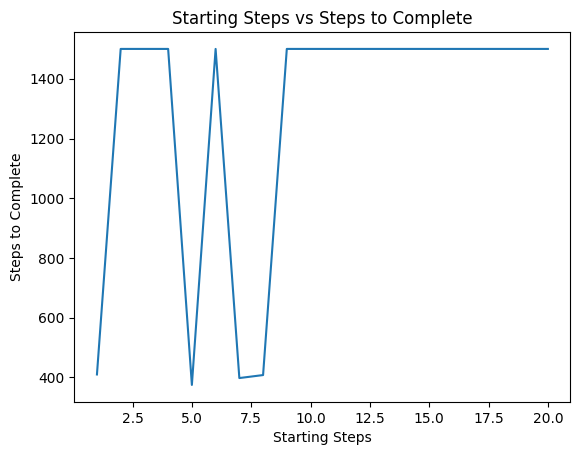

In [8]:
len = 20
food = 47
agents = 5
stargingSteps = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15, 16, 17, 18, 19, 20]

steps = []

for i in stargingSteps:
    steps.append(collectStatsUntilIter(len, len, agents, food, i))

plt.plot(stargingSteps, steps)
plt.xlabel("Starting Steps")
plt.ylabel("Steps to Complete")
plt.title("Starting Steps vs Steps to Complete")




## Different sizes

In [10]:
lens = [20, 40, 60, 80, 100]
food = 47
agents = 5


statsSizesCollected = []

for size in lens:
    stats = collectStats(size, size, agents, food,0)
    statsSizesCollected.append(stats)


Food collected at step:  377 in Size:  20


KeyboardInterrupt: 

## Different food quantities

In [11]:
size = 20
foodsQuantities = [50, 100, 150, 200, 250]
agents = 5

statsFoodsCollected = []

for food in foodsQuantities:
    stats = collectStats(size, size, agents, food,STARTING_STEP)
    statsFoodsCollected.append(stats)

Food collected at step:  411 in Size:  20
Food collected at step:  809 in Size:  20
Food collected at step:  1188 in Size:  20
Food collected at step:  1599 in Size:  20
Food collected at step:  1970 in Size:  20


## Graphs

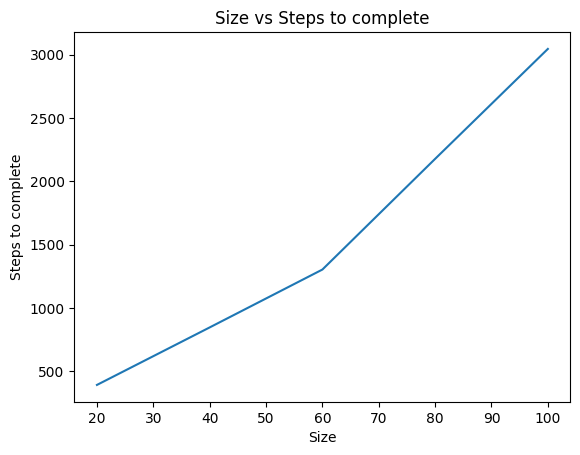

In [ ]:
# Plot the size vs steps to complete

plt.plot(lens, statsSizesCollected)
plt.xlabel("Size")
plt.ylabel("Steps to complete")
plt.title("Size vs Steps to complete")
plt.show()

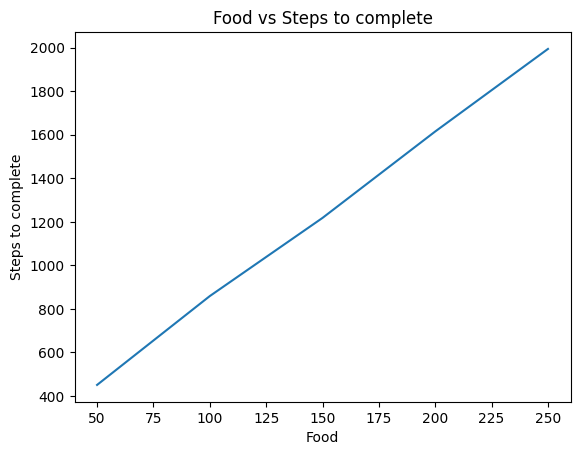

In [ ]:
# Plot the food vs steps to complete

plt.plot(foodsQuantities, statsFoodsCollected)
plt.xlabel("Food")
plt.ylabel("Steps to complete")
plt.title("Food vs Steps to complete")
plt.show()